### Given a bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.
Dataset Description: The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

Link to the Kaggle project:
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

Perform following steps:
1. Read the dataset.
2. Distinguish the feature and target set and divide the data set into training and test sets.
3. Normalize the train and test data.
4. Initialize and build the model. Identify the points of improvement and implement the same.
5. Print the accuracy score and confusion matrix (5 points).


In [1]:
!kaggle datasets download barelydedicated/bank-customer-churn-modeling

Dataset URL: https://www.kaggle.com/datasets/barelydedicated/bank-customer-churn-modeling
License(s): CC0-1.0




  0%|          | 0.00/262k [00:00<?, ?B/s]
100%|██████████| 262k/262k [00:01<00:00, 261kB/s]
100%|██████████| 262k/262k [00:01<00:00, 261kB/s]


In [2]:
!tar -xf bank-customer-churn-modeling.zip

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [13]:
df = pd.get_dummies(df, columns=["Geography", "Gender"])
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,False,True


In [14]:
df.drop(["Gender_Male", "Geography_Spain"], axis=1, inplace=True)

In [15]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Gender_Female
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,True
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,True
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,True
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,1,True,False,True
9998,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False


In [18]:
from sklearn.preprocessing import StandardScaler

cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()
scaled = scaler.fit_transform(df[cols])
scaled

array([[-0.32622142,  0.29351742, -1.04175968, -1.22584767,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759,  0.11735002,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776,  1.33305335,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, -1.22584767, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, -0.02260751, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386,  0.85996499, -1.07636976]])

In [19]:
scaled_df = pd.DataFrame(scaled, columns=cols)
df[cols] = scaled_df
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Gender_Female
0,-0.326221,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1,True,False,True
1,-0.440036,0.198164,-1.387538,0.117350,1,0,1,0.216534,0,False,False,True
2,-1.536794,0.293517,1.032908,1.333053,3,1,0,0.240687,1,True,False,True
3,0.501521,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0,True,False,True
4,2.063884,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,2,1,0,-0.066419,0,True,False,False
9996,-1.391939,-0.373958,1.724464,-0.306379,1,1,1,0.027988,0,True,False,False
9997,0.604988,-0.278604,0.687130,-1.225848,1,0,1,-1.008643,1,True,False,True
9998,1.256835,0.293517,-0.695982,-0.022608,2,1,0,-0.125231,1,False,True,False


In [20]:
x = df.drop("Exited", axis=1)
y = df["Exited"]

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 43)

In [49]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(
            hidden_layer_sizes = (12, 6, 4, 3), 
            max_iter = 500, 
            verbose = True,           
        )
nn.fit(x_train, y_train)

Iteration 1, loss = 0.77760324
Iteration 2, loss = 0.66254453
Iteration 3, loss = 0.58070508
Iteration 4, loss = 0.50424262
Iteration 5, loss = 0.47150403
Iteration 6, loss = 0.46141754
Iteration 7, loss = 0.45357999
Iteration 8, loss = 0.44663994
Iteration 9, loss = 0.44082814
Iteration 10, loss = 0.43553400
Iteration 11, loss = 0.43094731
Iteration 12, loss = 0.42702171
Iteration 13, loss = 0.42341443
Iteration 14, loss = 0.41989768
Iteration 15, loss = 0.41701469
Iteration 16, loss = 0.41344688
Iteration 17, loss = 0.40997072
Iteration 18, loss = 0.40692203
Iteration 19, loss = 0.40266612
Iteration 20, loss = 0.39896687
Iteration 21, loss = 0.39435543
Iteration 22, loss = 0.38894816
Iteration 23, loss = 0.38439682
Iteration 24, loss = 0.38025963
Iteration 25, loss = 0.37531538
Iteration 26, loss = 0.37152526
Iteration 27, loss = 0.36768668
Iteration 28, loss = 0.36366810
Iteration 29, loss = 0.36060551
Iteration 30, loss = 0.35724607
Iteration 31, loss = 0.35465834
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(12, 6, 4, 3), max_iter=500, verbose=True)

In [53]:
y_pred = nn.predict(x_test)

Accuracy:  0.8695
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.51      0.61       407

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.77      2000
weighted avg       0.86      0.87      0.86      2000



Text(50.722222222222214, 0.5, 'Actual')

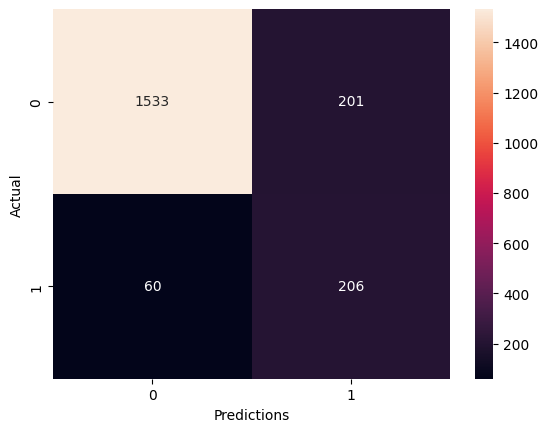

In [55]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

conf = confusion_matrix(y_pred, y_test)

sns.heatmap(conf, fmt = 'd', annot = True)
plt.xlabel('Predictions')
plt.ylabel("Actual")

In [61]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(
            hidden_layer_sizes = (100, 100, 100), 
            max_iter = 500, 
            verbose = True,           
        )
nn.fit(x_train, y_train)

Iteration 1, loss = 0.49633304
Iteration 2, loss = 0.42761029
Iteration 3, loss = 0.41144450
Iteration 4, loss = 0.39268010
Iteration 5, loss = 0.37372716
Iteration 6, loss = 0.35605244
Iteration 7, loss = 0.34561238
Iteration 8, loss = 0.33686499
Iteration 9, loss = 0.33352533
Iteration 10, loss = 0.32782678
Iteration 11, loss = 0.32697122
Iteration 12, loss = 0.32299783
Iteration 13, loss = 0.32193967
Iteration 14, loss = 0.31915308
Iteration 15, loss = 0.31474449
Iteration 16, loss = 0.31322109
Iteration 17, loss = 0.31284959
Iteration 18, loss = 0.30830776
Iteration 19, loss = 0.31136785
Iteration 20, loss = 0.30663668
Iteration 21, loss = 0.30306071
Iteration 22, loss = 0.30326762
Iteration 23, loss = 0.30083170
Iteration 24, loss = 0.29791069
Iteration 25, loss = 0.29918102
Iteration 26, loss = 0.29495567
Iteration 27, loss = 0.29452576
Iteration 28, loss = 0.28757005
Iteration 29, loss = 0.28586557
Iteration 30, loss = 0.28462227
Iteration 31, loss = 0.28067472
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=500, verbose=True)

In [62]:
y_pred = nn.predict(x_test)

Accuracy:  0.8315
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1593
           1       0.60      0.52      0.55       407

    accuracy                           0.83      2000
   macro avg       0.74      0.71      0.73      2000
weighted avg       0.82      0.83      0.83      2000



Text(50.722222222222214, 0.5, 'Actual')

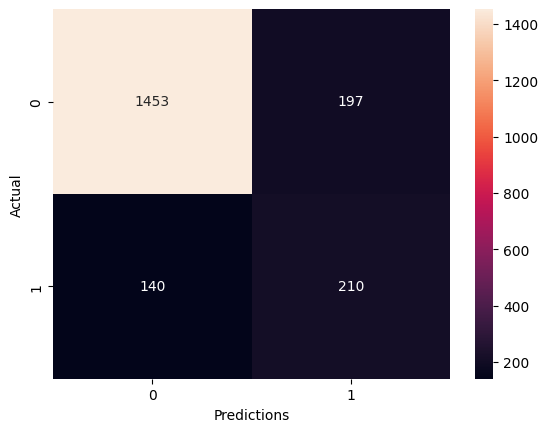

In [63]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

conf = confusion_matrix(y_pred, y_test)

sns.heatmap(conf, fmt = 'd', annot = True)
plt.xlabel('Predictions')
plt.ylabel("Actual")